In [26]:
import os

# Start from the notebook's directory (even if the working directory has changed)
# Use the notebook's location to navigate up two levels to /MachineLearning/tp1
notebook_dir = os.path.abspath(os.path.join(os.path.dirname('C:/Users/iegre/OneDrive/Escritorio/repositorio Git/Mi Repositorio/Mi-repo-de-la-facu/MachineLearning/tp1/notebooks/Entrega_TP1.ipynb'), '..'))
os.chdir(notebook_dir)

# Confirm the working directory
print(os.getcwd())

C:\Users\iegre\OneDrive\Escritorio\repositorio Git\Mi Repositorio\Mi-repo-de-la-facu\MachineLearning\tp1


## Aca profe le voy a tener que pedir que reemplace el path que ve en la funcion 'dirname', con sus propio path al notebook. Le pido mil disculpas por esto pero tuve algunos problemas con los imports y no encontre otra forma de solucionarlo que no sea esta.

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Now import from src
from src.preprocessing import *
from src.data_splitting import *
from src.metrics import *
from src.models import LinearRegression

## 1

In [28]:
# Cleaning before split

file_path = 'data/raw/casas_dev.csv'
df = pd.read_csv(file_path)
np.random.seed(41)
print(df.sample(5))
df = handle_nan_values(df)
convert_area_sqft_to_m2(df)
df = df.drop(columns=['area_units'])
df.to_csv('data/processed/cleaned_casas_dev.csv', index=False)

# Splitting into 80% train and 20% validation

file_path = 'data/processed/cleaned_casas_dev.csv'
df_clean = pd.read_csv(file_path)

df_train, df_val = train_val_split(df_clean)
df_train.to_csv('data/processed/train_cleaned_casas_dev.csv', index=False)
df_val.to_csv('data/processed/val_cleaned_casas_dev.csv', index=False)


      area area_units  is_house  has_pool   age  price        lat        lon  \
521   74.0         m2         0         0   2.0  144.0 -34.678902 -58.344607   
611   86.0         m2         1         1  13.0  171.0 -34.558005 -58.339507   
627  162.0         m2         1         1   NaN  337.0 -34.531375 -58.414459   
508  179.0         m2         1         0  14.0  325.0 -34.567397 -58.344539   
40   743.0       sqft         0         0  12.0  511.0  40.684026 -74.023627   

     rooms  
521    2.0  
611    2.0  
627    5.0  
508    5.0  
40     2.0  


Como se puede ver en este fragmento del dataset las unidades del area son distintas y esto genera problemas para el entrenamiento del modelo, entonces convierto todas a las areas a m2. Luego tambien se puede ver en la columna 'age' que hay un valor Nan, y lo que decidi hacer fue que cualquier fila que tenga un valor Nan la elimine. Esto lo decidi hacer asi porque me parecia medio extraño en caso de que puediese haber un Nan en la columna de rooms por ejemplo y que al rellenar con el valor de la media de rooms del dataset, pueda terminar habiendo muchas rooms en una casa con poco area, y me parecio que esto podria ser perjudicial para el modelo. Ahora, esto solo lo pudes hacer porque tengo suficientes muestras, en un caso donde no tuviese tantas, no seria conveniente eliminar filas. Tambien termine removiendo la columna de 'area_units' porque una vez pasadas todas las unidades a m2, la columna ya no aporta ninguna informacion.

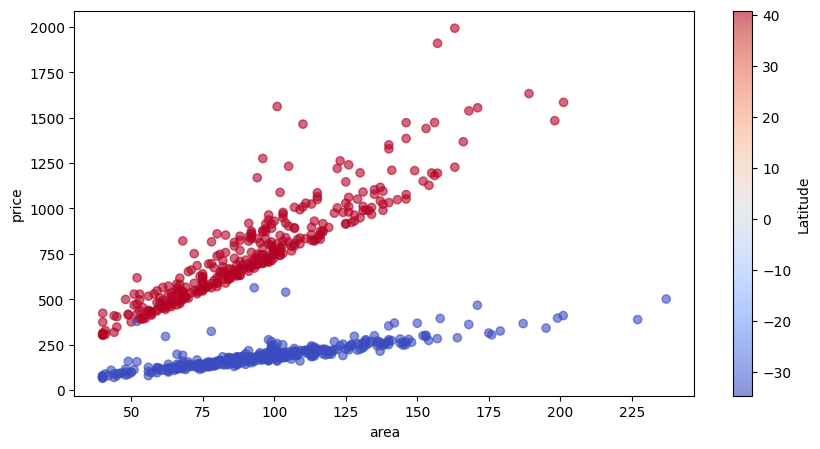

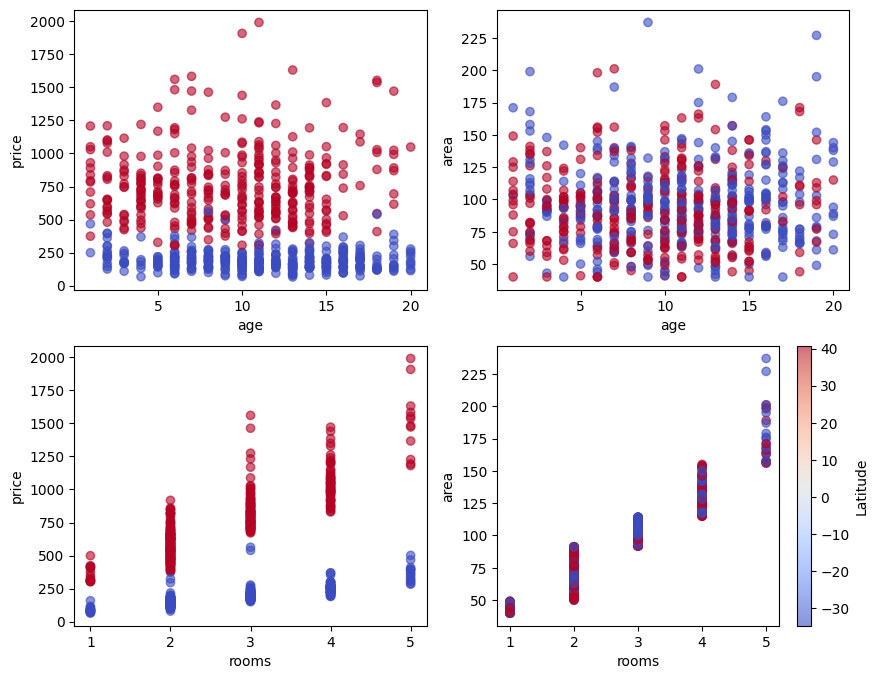

In [29]:
file_path = 'data/processed/cleaned_casas_dev.csv'
df = pd.read_csv(file_path)

plt.figure(figsize=(10, 5))

scatter =plt.scatter(df['area'],df['price'],c=df['lat'],cmap='coolwarm',alpha=0.6)
plt.xlabel('area')
plt.ylabel('price')
plt.colorbar(scatter, label='Latitude')
plt.show()

plt.figure(figsize=(10, 8))

plt.subplot(2,2,1)
scatter = plt.scatter(df['age'],df['price'],c=df['lat'],cmap='coolwarm',alpha=0.6)
plt.xlabel('age')
plt.ylabel('price')

plt.subplot(2,2,2)
scatter = plt.scatter(df['age'],df['area'],c=df['lat'],cmap='coolwarm',alpha=0.6)
plt.xlabel('age')
plt.ylabel('area')

plt.subplot(2,2,3)
scatter = plt.scatter(df['rooms'],df['price'],c=df['lat'],cmap='coolwarm',alpha=0.6)
plt.xlabel('rooms')
plt.ylabel('price')

plt.subplot(2,2,4)
scatter = plt.scatter(df['rooms'],df['area'],c=df['lat'],cmap='coolwarm',alpha=0.6)
plt.xlabel('rooms')
plt.ylabel('area')
plt.colorbar(scatter, label='Latitude')
plt.show()

Luego de hacer el pairplot, estos graficos son los que me parece que dan mas informacion sobre el dataset. El primero muestra dos claros clusters, habiendo sido coloreados dependiendo de su latitud. Esto demuestra que hay 2 ciudades distintas incluidas en el dataset. Tambien se puede ver que los clusters tienen pendiente positiva, pero se nota claramente que el cluster rojo, no solo tiene precios mayores de media, sino que a medida que aumenta el area el precio aumenta mas, en comparacion con el cluster azul que aunque el area aumente significativamente el precio no varia mucho. Despues en la segunda tanda de graficos se puede notar que no hay ninguna relacion clara entre el precio de una casa y su edad. Pero si se puede ver una relacion linear entre el precio y las habitaciones de una casa. Esto ayuda a confirmar lo especulado sobre el primer grafico ya que el area tambien tiene una relacion lineal con la cantidad de habitaciones.

## 2-3

In [30]:
# Amanda clean

file_path = 'data/raw/vivienda_Amanda.csv'
amanda_df = pd.read_csv(file_path)
convert_area_sqft_to_m2(amanda_df)
amanda_df = amanda_df.drop(columns=['area_units'])
amanda_df.to_csv('data/processed/cleaned_Amanda.csv', index=False) 

# Read train file

file_path = 'data/processed/train_cleaned_casas_dev.csv'
df_train = pd.read_csv(file_path)
X_train = df_train.drop(columns=['price'])
Y_train = df_train['price']

# Read validation file

file_path = 'data/processed/val_cleaned_casas_dev.csv'
df_val = pd.read_csv(file_path)
X_val = df_val.drop(columns=['price'])
Y_val = df_val['price']

# Read amanda file

file_path = 'data/processed/cleaned_Amanda.csv'
df_amanda = pd.read_csv(file_path)

# Regresion with only area

regresion = LinearRegression(method ='pseudo_inverse')
regresion.fit(X_train['area'],Y_train)

regresion.print_coefficients()

pred_val = regresion.predict(X_val['area'])
print(' ')
print(f'mean squared error: {mean_squared_error(Y_val, pred_val)}')

pred_amanda = regresion.predict(df_amanda['area'])
print(f'Amanda prediction: {pred_amanda}')

Model Coefficients:
bias: 68.2053
area: 4.3243
 
mean squared error: 100628.97995712639
Amanda prediction: [517.91938195]


In [31]:
# Regresion with all features

regresion = LinearRegression(method='pseudo_inverse')
regresion.fit(X_train,Y_train)
print('')

regresion.print_coefficients()

pred_val = regresion.predict(X_val)
print(' ')
print(f'mean squared error: {mean_squared_error(Y_val, pred_val)}')

pred_amanda = regresion.predict(df_amanda)
print(pred_amanda)


Model Coefficients:
bias: 1946.0378
area: 4.1264
is_house: 75.1770
has_pool: 52.8568
age: -3.1298
lat: 14.5679
lon: 30.2049
rooms: 31.5419
 
mean squared error: 10839.018231247652
[792.35923285]


In [32]:
# Calculating mean value per m2 from whole dataset

file_path = 'data/processed/cleaned_casas_dev.csv'
df = pd.read_csv(file_path)

print(mean_value_per_m2(df))

5.004901040988375


Como se puede ver, al hacer una prediccion solo teniendo en cuenta el 'area' el error cuadratico medio es enorme, demostrando que no es una buena idea usar pocas caracteristicas y eso se puede confirmar al usar todas las caracteristicas del dataset y ver que el ECM es casi 10 veces menor. En cuanto al valor medio por m2 de una casa, se puede notar que el calculado y el peso que el modelo le asigno al area son bastantes similares, con esto podemos darnos cuenta que el modelo le asigna a los pesos un valor promedio que aumenta el precio por cada unidad que aumente de esa caracteristica. Con respecto a Benito queriendo construir una casa en su propiedad, si utilizamos la hipotesis anterior de que el modelo le da un peso a la caracterisitca dependiendo de cuanto aumente el precio si aumenta esa caracterisitca, entonces uno esperaria que el valor de la propiedad de benito aumente en $43 aproximadamente. Ya que 'has_pool' al ser una caracteristica binarai, el modelo le asigna un peso de que si la casa tiene pileta entonces el precio aumenta 43.

## 4

In [33]:
# Create own features on train

file_path = 'data/processed/train_cleaned_casas_dev.csv'
df_train = pd.read_csv(file_path)

create_feature_area_per_room(df_train)
create_feature_house_and_pool(df_train)
create_feature_age_range(df_train)

df_train.to_csv('data/processed/own_featured_train_casas_dev.csv', index=False)

# Create own features on validation

file_path = 'data/processed/val_cleaned_casas_dev.csv'
df_val = pd.read_csv(file_path)

create_feature_area_per_room(df_val)
create_feature_house_and_pool(df_val)
create_feature_age_range(df_val)

df_val.to_csv('data/processed/own_featured_val_casas_dev.csv', index=False)

# Create own features on Amanda

file_path = 'data/processed/cleaned_Amanda.csv'
df_Amanda = pd.read_csv(file_path)

create_feature_area_per_room(df_Amanda)
create_feature_house_and_pool(df_Amanda)
create_feature_age_range(df_Amanda)

df_Amanda.to_csv('data/processed/own_featured_Amanda.csv', index=False)

# Read own featured train file

file_path = 'data/processed/own_featured_train_casas_dev.csv'
df = pd.read_csv(file_path)
X_train = df.drop(columns=['price'])
Y_train = df['price']

# Read own featured validation file

file_path = 'data/processed/own_featured_val_casas_dev.csv'
df_val = pd.read_csv(file_path)
X_val = df_val.drop(columns=['price'])
Y_val = df_val['price']

# Read own featured amanda file

file_path = 'data/processed/own_featured_Amanda.csv'
df_amanda = pd.read_csv(file_path)

# Regresion with own features

regresion = LinearRegression(method='pseudo_inverse')
regresion.fit(X_train,Y_train)

regresion.print_coefficients()

pred_val = regresion.predict(X_val)
print(' ')
print(f'mean squared error: {mean_squared_error(Y_val, pred_val)}')

pred_amanda = regresion.predict(df_amanda)
print(pred_amanda)


Model Coefficients:
bias: -480.8586
area: -0.9314
is_house: 75.0885
has_pool: 53.0126
age: -3.0721
lat: 7.9706
lon: -1.7503
rooms: 214.3020
area_per_room: 13.3955
has_pool_and_house: 2.3131
age_new: -159.6846
age_mid: -163.1696
age_old: -158.0044
 
mean squared error: 10798.94240030759
[786.33372242]


In [34]:
# Create exponential features train

file_path = 'data/processed/train_cleaned_casas_dev.csv'
df_train = pd.read_csv(file_path)

df_train = expand_features(df_train)
df_train = df_train.drop(columns=['rooms^43'])

df_train.to_csv('data/processed/exponential_featured_train_casas_dev.csv', index=False)

# Create exponential features val

file_path = 'data/processed/val_cleaned_casas_dev.csv'
df_val = pd.read_csv(file_path)

df_val = expand_features(df_val)
df_val = df_val.drop(columns=['rooms^43'])

df_val.to_csv('data/processed/exponential_featured_val_casas_dev.csv', index=False)

# Create exponential features Amanda

file_path = 'data/processed/cleaned_Amanda.csv'
df_amanda = pd.read_csv(file_path)

df_amanda = expand_features(df_amanda)
df_amanda = df_amanda.drop(columns=['rooms^43'])

df_amanda.to_csv('data/processed/exponential_featured_Amanda.csv', index=False)

# Read expoenential train

file_path = 'data/processed/exponential_featured_train_casas_dev.csv'
df_train = pd.read_csv(file_path)
X_train = df_train.drop(columns=['price'])
Y_train = df_train['price']

# Read exponential val

file_path = 'data/processed/exponential_featured_val_casas_dev.csv'
df_val = pd.read_csv(file_path)
X_val = df_val.drop(columns=['price'])
Y_val = df_val['price']

# Read exponential Amanda

file_path = 'data/processed/exponential_featured_Amanda.csv'
df_amanda = pd.read_csv(file_path)

# Regresion with exponential features

regresion = LinearRegression(method='pseudo_inverse')
regresion.fit(X_train,Y_train)

regresion.print_coefficients()

pred_val = regresion.predict(X_val)
print(' ')
print(f'mean squared error: {mean_squared_error(Y_val, pred_val)}')

pred_amanda = regresion.predict(df_amanda)
print(pred_amanda)

Model Coefficients:
bias: 0.0000
area: -0.0000
is_house: 0.0000
has_pool: -0.0000
age: 0.0000
lat: -0.0000
lon: 0.0000
rooms: 0.0000
area^2: 0.0000
is_house^2: 0.0000
has_pool^2: 0.0000
age^2: 0.0000
lat^2: 0.0000
lon^2: 0.0000
rooms^2: 0.0000
area^3: 0.0000
is_house^3: 0.0000
has_pool^3: 0.0000
age^3: 0.0000
lat^3: -0.0000
lon^3: -0.0000
rooms^3: 0.0000
area^4: 0.0000
is_house^4: 0.0000
has_pool^4: 0.0000
age^4: 0.0000
lat^4: 0.0000
lon^4: 0.0000
rooms^4: 0.0000
area^5: 0.0000
is_house^5: 0.0000
has_pool^5: 0.0000
age^5: 0.0000
lat^5: 0.0000
lon^5: -0.0000
rooms^5: 0.0000
area^6: 0.0000
is_house^6: 0.0000
has_pool^6: 0.0000
age^6: 0.0000
lat^6: 0.0000
lon^6: 0.0000
rooms^6: 0.0000
area^7: 0.0000
is_house^7: 0.0000
has_pool^7: 0.0000
age^7: 0.0000
lat^7: 0.0000
lon^7: -0.0000
rooms^7: 0.0000
area^8: 0.0000
is_house^8: 0.0000
has_pool^8: 0.0000
age^8: 0.0000
lat^8: 0.0000
lon^8: 0.0000
rooms^8: 0.0000
area^9: 0.0000
is_house^9: 0.0000
has_pool^9: 0.0000
age^9: 0.0000
lat^9: 0.0000
lon^9

Como se puede ver al hacer un poco de feature engeneering, con tan solo agregar 4 columnas al dataset, que son un derivado de las ya presentes en el dataset original, logramos reducir un podo el ECM. Demostrando de esta forma que se le puede dar al modelo otra 'perspectiva' de como ver la infomacion ya presente en el dataset original. Por el otro lado, ponerse a agregar columnas a lo loco no es buena idea y eso se puede ver con el modelo entrenado con las caracterisitcas potenciadas. Se puede ver como el ECM se dispara y la prediccion sobre Amanda es totalmente erronea. Por lo tanto no siempre agregar mas es bueno. Hay que encontrar un equilibrio a la hora de hacer feature engeneering.

## 5

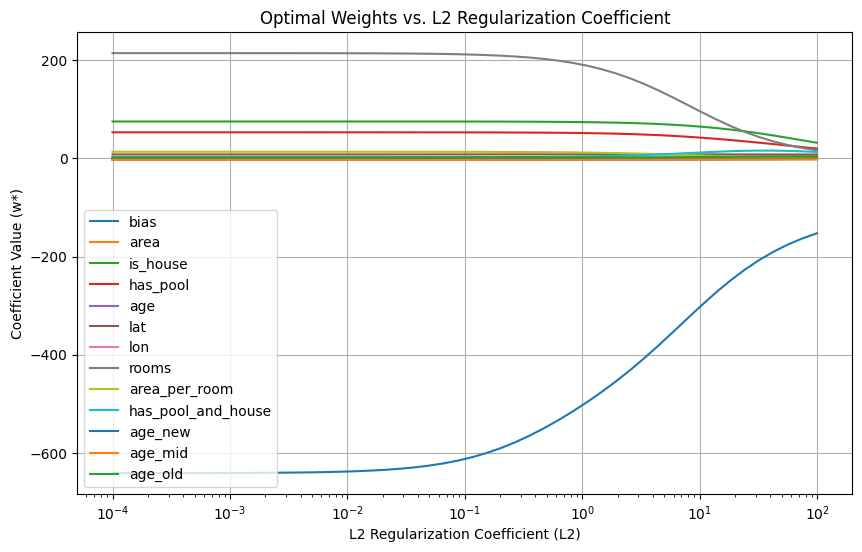

In [35]:
# Read own featured train file

file_path = 'data/processed/own_featured_train_casas_dev.csv'
df = pd.read_csv(file_path)
X_train = df.drop(columns=['price'])
Y_train = df['price']

# Read own featured validation file

file_path = 'data/processed/own_featured_val_casas_dev.csv'
df_val = pd.read_csv(file_path)
X_val = df_val.drop(columns=['price'])
Y_val = df_val['price']

# Range of L2 values to test
l2_values = np.logspace(-4, 2, 50)  # From 10^-4 to 10^2

coefficients = []

# Train the model for each L2 value (L1 = 0)
for l2 in l2_values:
    model = LinearRegression(method='pseudo_inverse', learning_rate=0.01, epochs=1000, L1=0.0, L2=l2)
    model.fit(X_train,Y_train)
    coefficients.append(model.coef)

# Convert coefficients to a NumPy array for plotting
coefficients = np.array(coefficients)

plt.figure(figsize=(10, 6))
for i, feature_name in enumerate(model.feature_names):
    plt.plot(l2_values, coefficients[:, i], label=feature_name)

plt.xscale('log')
plt.xlabel('L2 Regularization Coefficient (L2)')
plt.ylabel('Coefficient Value (w*)')
plt.title('Optimal Weights vs. L2 Regularization Coefficient')
plt.legend()
# plt.ylim(-300,250)
plt.grid(True)
plt.show()

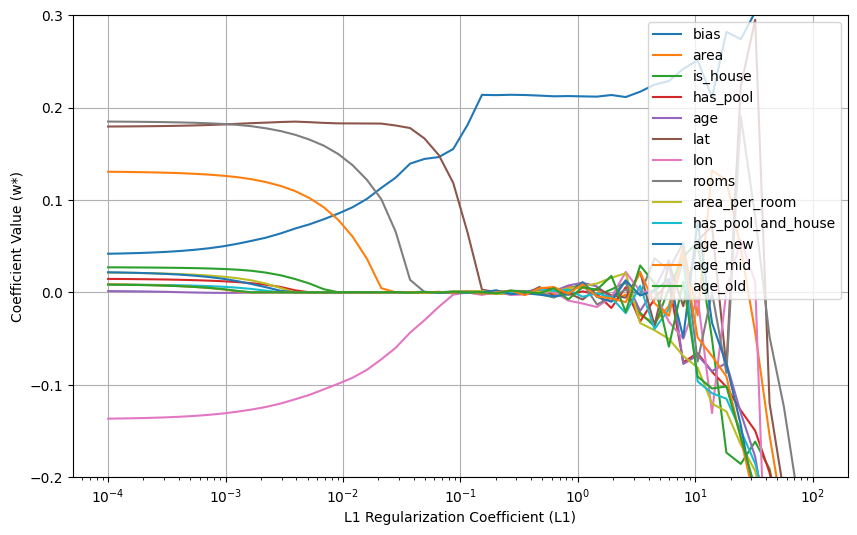

In [36]:
# Normalized featured train 

file_path = 'data/processed/own_featured_train_casas_dev.csv'
df_train = pd.read_csv(file_path)

normalize('area',df_train)
normalize('price',df_train)
normalize('age',df_train)
normalize('lat',df_train)
normalize('lon',df_train)
normalize('rooms',df_train)
normalize('area_per_room',df_train)

df_train.to_csv('data/processed/normalized_own_featured_train_casas_dev.csv', index=False)

# Normalized featured validation

file_path = 'data/processed/own_featured_val_casas_dev.csv'
df_val = pd.read_csv(file_path)

normalize('area',df_val)
normalize('price',df_val)
normalize('age',df_val)
normalize('lat',df_val)
normalize('lon',df_val)
normalize('rooms',df_val)
normalize('area_per_room',df_val)

df_val.to_csv('data/processed/normalized_own_featured_val_casas_dev.csv', index=False)

# Read normalized own featured train file

file_path = 'data/processed/normalized_own_featured_train_casas_dev.csv'
df = pd.read_csv(file_path)
X_train = df.drop(columns=['price'])
Y_train = df['price']

# Read normalized own featured validation file

file_path = 'data/processed/normalized_own_featured_val_casas_dev.csv'
df_val = pd.read_csv(file_path)
X_val = df_val.drop(columns=['price'])
Y_val = df_val['price']

l1_values = np.logspace(-4, 2, 50)  # From 10^-4 to 10^2

coefficients = []

# Train the model for each L1 value (L1 = 0)
for l1 in l1_values:
    model = LinearRegression(method='gradient_descent', learning_rate=0.01, epochs=1000, L1=l1, L2=0.0)
    model.fit(X_train,Y_train)
    coefficients.append(model.coef)

coefficients = np.array(coefficients)

plt.figure(figsize=(10, 6))
for i, feature_name in enumerate(model.feature_names):
    plt.plot(l1_values, coefficients[:, i], label=feature_name)

plt.xscale('log')
plt.xlabel('L1 Regularization Coefficient (L1)')
plt.ylabel('Coefficient Value (w*)')
plt.legend()
plt.ylim(-0.2,0.3)
plt.grid(True)
plt.show()

Se puede ver que ambas regularizaciones logran reducir los valores de los pesos del modelo, llevandolos a estos a valores muy cercanos a cero. Pero se pueden notar dos diferencias importantes, la primera es que la regularizacion L2 reduce el valor del 'bias', mientras que la L1 solo lo hace incrementar y es interesante como en L1 el unico peso que aumentea es el de 'bias'. La otra diferencia muy notoria es que a medida que aumenta el coeficiente de regularizacion, L2 lleva a los pesos a valores cada vez mas cercanos a cero, mientras que en L1 los pesos empiezan a alternar de valor con cada vez mayor divergencia. Esto se debe a que la regularizacion L2, los features que no considera importantes los lleva a valores cercanos a 0, mientrsa que la regularizacion L1, a los features poco importantes les asigna pesos negativos y esto como se puede ver puede ser problematico si no se elige un coeficiente de regularizacion adecuado.

In [37]:
# Read own featured train file

file_path = 'data/processed/own_featured_train_casas_dev.csv'
df = pd.read_csv(file_path)
X_train = df.drop(columns=['price'])
Y_train = df['price']

# Read own featured validation file

file_path = 'data/processed/own_featured_val_casas_dev.csv'
df_val = pd.read_csv(file_path)
X_val = df_val.drop(columns=['price'])
Y_val = df_val['price']

# Elegir lambda fundamentado
print('Elegir lambda')
model = LinearRegression(method='pseudo_inverse', learning_rate=0.01, epochs=1000, L1=0.0, L2=6)
model.fit(X_train,Y_train)

pred_val = model.predict(X_val)
print(f'mean squared error: {mean_squared_error(Y_val, pred_val)}')

model.print_coefficients()

Elegir lambda
mean squared error: 10697.163925645047
Model Coefficients:
bias: -352.6846
area: 1.5917
is_house: 68.3646
has_pool: 45.6759
age: -2.8830
lat: 8.1679
lon: -0.6421
rooms: 123.3332
area_per_room: 7.5788
has_pool_and_house: 9.2825
age_new: 0.0165
age_mid: -2.4524
age_old: 2.4360


Elegi 6 como coeficiente de regularizacion, porque al observar el grafico me parecia bien elegir un punto donde el 'bias' no tenga un valor tan alto y donde varias de las features no tan relevantes ya tengan asignados valores cerca de 0. La regularizacion L2 beneficia al modelo al darle a features no tan relevantes, valores cercanos a cero, para que no afecten tanto a la prediccion.

Best regularization coefficient: 5.963623316594637


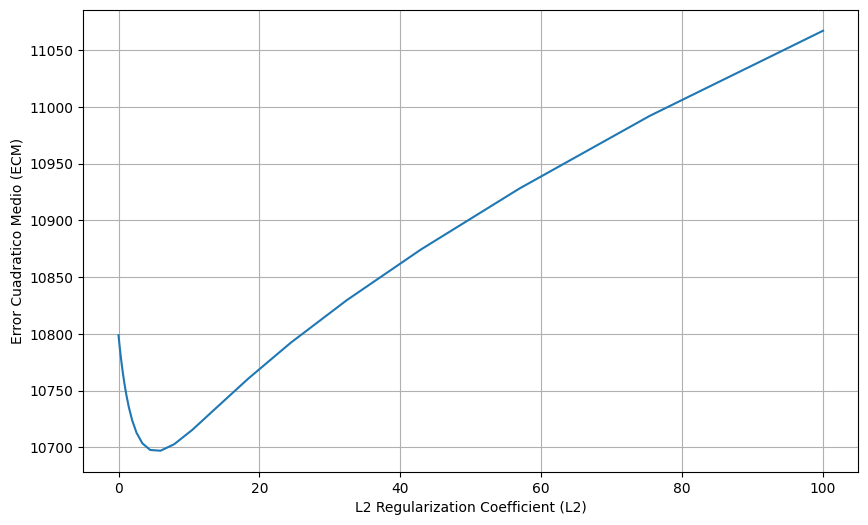

In [38]:
l2_values = np.logspace(-4, 2, 50)  # From 10^-4 to 10^2

ecms = []

# Train the model for each L2 value
for l2 in l2_values:
    model = LinearRegression(method='pseudo_inverse', learning_rate=0.01, epochs=1000, L1=0.0, L2=l2)
    model.fit(X_train,Y_train)
    pred_val = model.predict(X_val)
    ecms.append(model.mean_squared_error(Y_val, pred_val))

min_index = ecms.index(min(ecms))
best_coef_train = l2_values[min_index]
print(f'Best regularization coefficient: {best_coef_train}')

plt.figure(figsize=(10, 6))
plt.plot(l2_values, ecms)
plt.xlabel('L2 Regularization Coefficient (L2)')
plt.ylabel('Error Cuadratico Medio (ECM)')

plt.grid(True)
plt.show()

Como se puede ver en el grafico, utilizar regularizacion L2 efectivamente reduce el ECM, pero esto es dependiente del dataset, probe otras combinaciones de distribucion de datos en train y validation y utilizar regularizacion no siempre fue beneficioso.

Fold 1/5 - Test MSE: 14042.6887
Fold 2/5 - Test MSE: 21722.7889
Fold 3/5 - Test MSE: 23591.8734
Fold 4/5 - Test MSE: 10481.5621
Fold 5/5 - Test MSE: 13228.4837

Average Test MSE across 5 folds: 16613.4794
Fold 1/5 - Test MSE: 14042.6834
Fold 2/5 - Test MSE: 21722.7875
Fold 3/5 - Test MSE: 23591.8784
Fold 4/5 - Test MSE: 10481.5553
Fold 5/5 - Test MSE: 13228.4832

Average Test MSE across 5 folds: 16613.4776
Fold 1/5 - Test MSE: 14042.6764
Fold 2/5 - Test MSE: 21722.7857
Fold 3/5 - Test MSE: 23591.8851
Fold 4/5 - Test MSE: 10481.5462
Fold 5/5 - Test MSE: 13228.4825

Average Test MSE across 5 folds: 16613.4752
Fold 1/5 - Test MSE: 14042.6670
Fold 2/5 - Test MSE: 21722.7832
Fold 3/5 - Test MSE: 23591.8939
Fold 4/5 - Test MSE: 10481.5341
Fold 5/5 - Test MSE: 13228.4816

Average Test MSE across 5 folds: 16613.4720
Fold 1/5 - Test MSE: 14042.6546
Fold 2/5 - Test MSE: 21722.7801
Fold 3/5 - Test MSE: 23591.9056
Fold 4/5 - Test MSE: 10481.5181
Fold 5/5 - Test MSE: 13228.4805

Average Test MSE ac

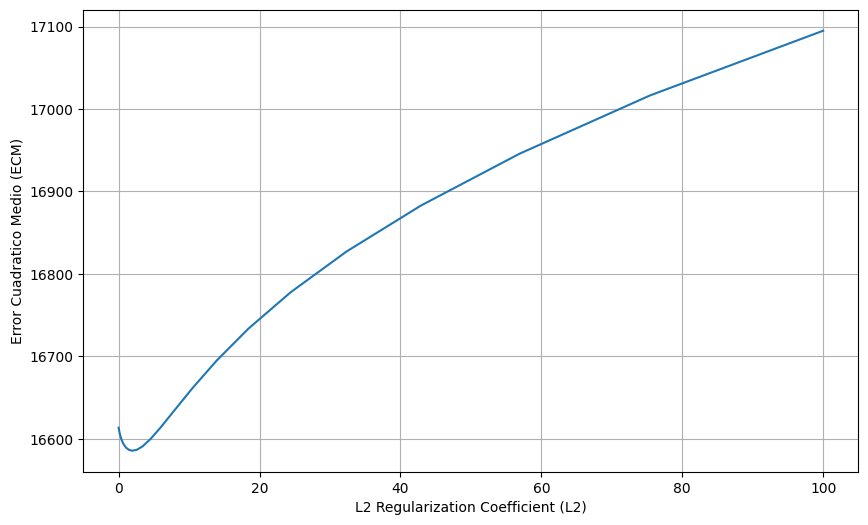

In [39]:
file_path = 'data/processed/cleaned_casas_dev.csv'
df = pd.read_csv(file_path)

create_feature_area_per_room(df)
create_feature_house_and_pool(df)
create_feature_age_range(df)

df.to_csv('data/processed/own_featured_cleaned_casas_dev.csv', index=False)

file_path = 'data/processed/own_featured_cleaned_casas_dev.csv'
df = pd.read_csv(file_path)
X = df.drop(columns=['price'])
Y = df['price']


l2_values = np.logspace(-4, 2, 50)  # From 10^-4 to 10^2

ecms = []

for l2 in l2_values:
    cv_results = cross_validate_linear_regression(
        X, Y,
        k=5,
        method='pseudo_inverse',
        learning_rate=0.01,
        epochs=1000,
        L1=0.0,
        L2=l2
    )
    ecms.append(cv_results['mean_mse'])

min_index = ecms.index(min(ecms))
best_coef_cross = l2_values[min_index]
print(f'Best regularization coefficient: {best_coef_cross}')

plt.figure(figsize=(10, 6))
plt.plot(l2_values, ecms)
plt.xlabel('L2 Regularization Coefficient (L2)')
plt.ylabel('Error Cuadratico Medio (ECM)')

plt.grid(True)
plt.show()

Se puede ver que tanto al usar cross validation como sin, usar regularizacion L2 reduce el ECM y ambas curvas indican que coeficientes entre 0 y 7 aproximadamente, son utiles para reducir el error. Se puede ver tambien que el error promedio al usar cross validation, es mas alto, esto era de esperar ya que al usar cross validation uno obtiene un comportamiento mas general de su modelo, y como se puede ver en los prints, dependiendo de los folds el error varia entre 9k y 22k. Por eso es muy util esta tecnica para medir realmente el rendimiento de generalizacion del modelo.

## 6

Para produccion yo utlizaria el dataset con feature engeneering, utilizaria cross validation y regularizacion L2. Luego de haber hecho todo el analisis anterior, creo que estas tecnicas serian las mas eficaces para realmente entender el rendimiento del modelo, y que no haya un factor de suerte, como por ejemplo como se divide el set de train y val, que te haga pensar que el modelo rinde de cierta manera, pero que en realidad su rendimiento de generalizacion es bastante peor. Y por otro lado de esta manera se le puede ayudar al modelo a dar mejores resultados, al agregar features al dataset que aporten nueva informacion y ayudar al modelo a que le de mas valor a algunas features que a otras. Con estas tecnicas uno conseguiria un mejor rendimiento en casos reales. 

In [40]:
# Test cleaned and featured

file_path = 'data/raw/casas_test.csv'
df = pd.read_csv(file_path)
df = handle_nan_values(df)
convert_area_sqft_to_m2(df)
df = df.drop(columns=['area_units'])
create_feature_age_range(df)
create_feature_area_per_room(df)
create_feature_house_and_pool(df)
df.to_csv('data/processed/own_featured_cleaned_casas_test.csv', index=False)

# Read test

file_path = 'data/processed/own_featured_cleaned_casas_test.csv'
df = pd.read_csv(file_path)
X_test = df.drop(columns=['price'])
Y_test = df['price']

# Read train

file_path = 'data/processed/own_featured_train_casas_dev.csv'
df = pd.read_csv(file_path)
X_train = df.drop(columns=['price'])
Y_train = df['price']

# Regresion

regresion = LinearRegression(method='pseudo_inverse',L2=best_coef_train)
regresion.fit(X_train,Y_train)

pred_test = regresion.predict(X_test)
print(f'mean squared error: {mean_squared_error(Y_test, pred_test)}')
print(f'mean absolute error: {mean_absolute_error(Y_test, pred_test)}')
print(f'root mean squared error: {root_mean_squared_error(Y_test, pred_test)}')

mean squared error: 131936.19242182112
mean absolute error: 339.354828214054
root mean squared error: 363.23021958782715


Como se puede ver, el modelo no generaliza muy bien, porque tiene un error muy grande, pero es un resultado esperable debido a la poca cantidad de muestras que tenemos disponibles para entrenar.